Zad 2

In [1]:
import requests
from concurrent.futures import ThreadPoolExecutor
import os

urls = [
    "https://www.python.org",
    "https://www.wikipedia.org",
    "https://www.openai.com",
    "https://www.google.com",
    "https://www.github.com"
]

def fetch_and_save(url):
    try:
        response = requests.get(url)
        filename = url.split("//")[1].split(".")[0] + ".html"
        with open(filename, 'w', encoding='utf-8') as f:
            f.write(response.text)
        print(f"[DONE] Zakończono pobieranie: {url}")
    except Exception as e:
        print(f"[ERROR] Problem z {url}: {e}")

# Oblicz maksymalną liczbę wątków - połowa dostępnych rdzeni
max_threads = max(1, os.cpu_count() // 2)

with ThreadPoolExecutor(max_workers=max_threads) as executor:
    executor.map(fetch_and_save, urls)

print("Wszystkie strony zostały pobrane.")


[DONE] Zakończono pobieranie: https://www.openai.com
[DONE] Zakończono pobieranie: https://www.google.com
[DONE] Zakończono pobieranie: https://www.wikipedia.org
[DONE] Zakończono pobieranie: https://www.python.org
[DONE] Zakończono pobieranie: https://www.github.com
Wszystkie strony zostały pobrane.


Zad 1 

In [2]:
import os
import threading
from time import perf_counter

def fib(n):
    return n if n < 2 else fib(n - 2) + fib(n - 1)

threads = []
print('Uruchamianie wątków...')
t0 = perf_counter()

for _ in range(os.cpu_count()):
    threads.append(threading.Thread(target=fib, args=(25,)))

for t in threads:
    t.start()   

for t in threads:
    t.join()

print(f'Czas wykonania: {perf_counter() - t0}.')

Uruchamianie wątków...
Czas wykonania: 0.12124739999126177.


In [3]:
import os
import multiprocessing as mp
from time import perf_counter

def fib(n):
    return n if n < 2 else fib(n - 2) + fib(n - 1)


if __name__ == '__main__':

    processes = []
    print('Uruchamianie procesów...')
    t0 = perf_counter()

    for _ in range(os.cpu_count()):
        processes.append(mp.Process(target=fib, args=(25,)))

    for t in processes:
        t.start()   

    for t in processes:
        t.join()

    print(f'Czas wykonania: {perf_counter() - t0}.')

Uruchamianie procesów...
Czas wykonania: 0.18970490001083817.


In [4]:
import os
import csv
import threading
import multiprocessing as mp
from time import perf_counter

def fib(n):
    return n if n < 2 else fib(n - 2) + fib(n - 1)

def run_threads(n):
    threads = []
    for _ in range(os.cpu_count()):
        threads.append(threading.Thread(target=fib, args=(n,)))
    for t in threads:
        t.start()
    for t in threads:
        t.join()

def run_processes(n):
    processes = []
    for _ in range(os.cpu_count()):
        processes.append(mp.Process(target=fib, args=(n,)))
    for p in processes:
        p.start()
    for p in processes:
        p.join()

def benchmark(fib_n, repetitions, output_csv):
    with open(output_csv, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["numer_testu", "rodzaj", "fibo_n", "sredni_czas"])

        for i in range(1, repetitions + 1):
            # Threads
            t0 = perf_counter()
            run_threads(fib_n)
            t1 = perf_counter()
            thread_time = t1 - t0
            writer.writerow([i, "wątki", fib_n, round(thread_time, 4)])

            # Processes
            t0 = perf_counter()
            run_processes(fib_n)
            t1 = perf_counter()
            process_time = t1 - t0
            writer.writerow([i, "procesy", fib_n, round(process_time, 4)])

if __name__ == "__main__":
    benchmark(fib_n=25, repetitions=3, output_csv="benchmark_results.csv")


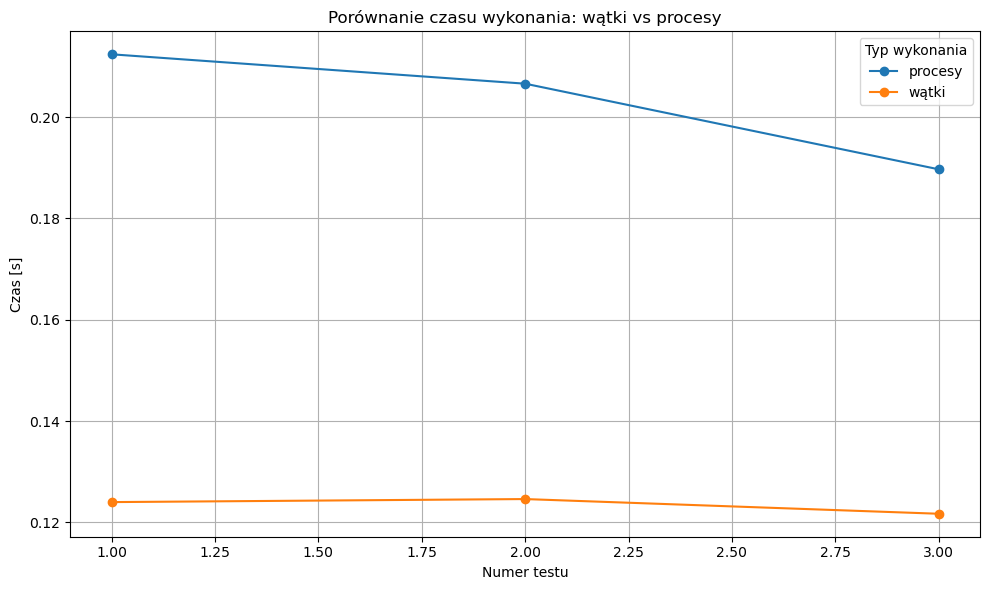

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("benchmark_results.csv")
grouped = df.groupby("rodzaj")["sredni_czas"].mean().reset_index()
pivoted = df.pivot(index="numer_testu", columns="rodzaj", values="sredni_czas")

# Wykres
pivoted.plot(marker='o', linestyle='-', figsize=(10, 6))
plt.title("Porównanie czasu wykonania: wątki vs procesy")
plt.xlabel("Numer testu")
plt.ylabel("Czas [s]")
plt.grid(True)
plt.legend(title="Typ wykonania")
plt.tight_layout()
plt.show()
